In [24]:
import os
import math 
import numpy as np
import pandas as pd
import scipy as sp

from datetime import datetime
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

This interesting dataset from UCI Machine Learning repository is actually 3 similar datasets in one. They center around breast tumor identification and come from the University of Wisconsin, Clinical Sciences Center.

In [25]:
file1 = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Breast Cancer Dx Project\wdbc-data.csv'
file2 = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Breast Cancer Dx Project\breast-cancer-wisconsin.csv'
file3 = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Breast Cancer Dx Project\wpbc-data'

file1 is raw data from breast tissue exams that will be used to predict whether tumors are benign or malignant.
file2 is similar data, but scored on a 1-10 scale instead of raw, used to predict malignancy of tumors also.
file3 is data presented similarly to file1 (raw) containing follow-up data from patients who had treatment for their tumor, for the purpose of predicting cancer recurrence.

First we will examine file1

In [26]:
df1 = pd.read_csv(file1,header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df1.shape

(569, 32)

In [28]:
df1.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [30]:
df1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

This data appears neat and orderly. The people submitting the data pre-cleaned it to ensure no missing values

Next we can check for repeat subjects (to prevent data leakage).

In [31]:
df1[0].nunique()

569

Great; this number matches the length of our data, so every subject is indeed unique.

At this point, the data should be paired down to what we will need for model-building.

In [32]:
df1[[1,2]]

,1,2
0,M,17.99
1,M,20.57
2,M,19.69
3,M,11.42
4,M,20.29
...,...,...
564,M,21.56
565,M,20.13
566,M,16.60
567,M,20.60


Our file1 data is described by the original researchers in such a way that the worst 3 breast tumor measurements (of many) are averaged together to create the final 10 columns of the data.

In [33]:
df1 = df1[[1,22,23,24,25,26,27,28,29,30,31]]
df1.head()

,1,22,23,24,25,26,27,28,29,30,31
0,M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
df1.columns=['tumor','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points','symmetry','fractal_dimension']
df1.head()

,tumor,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we can get an idea of the distribution of each of our features.

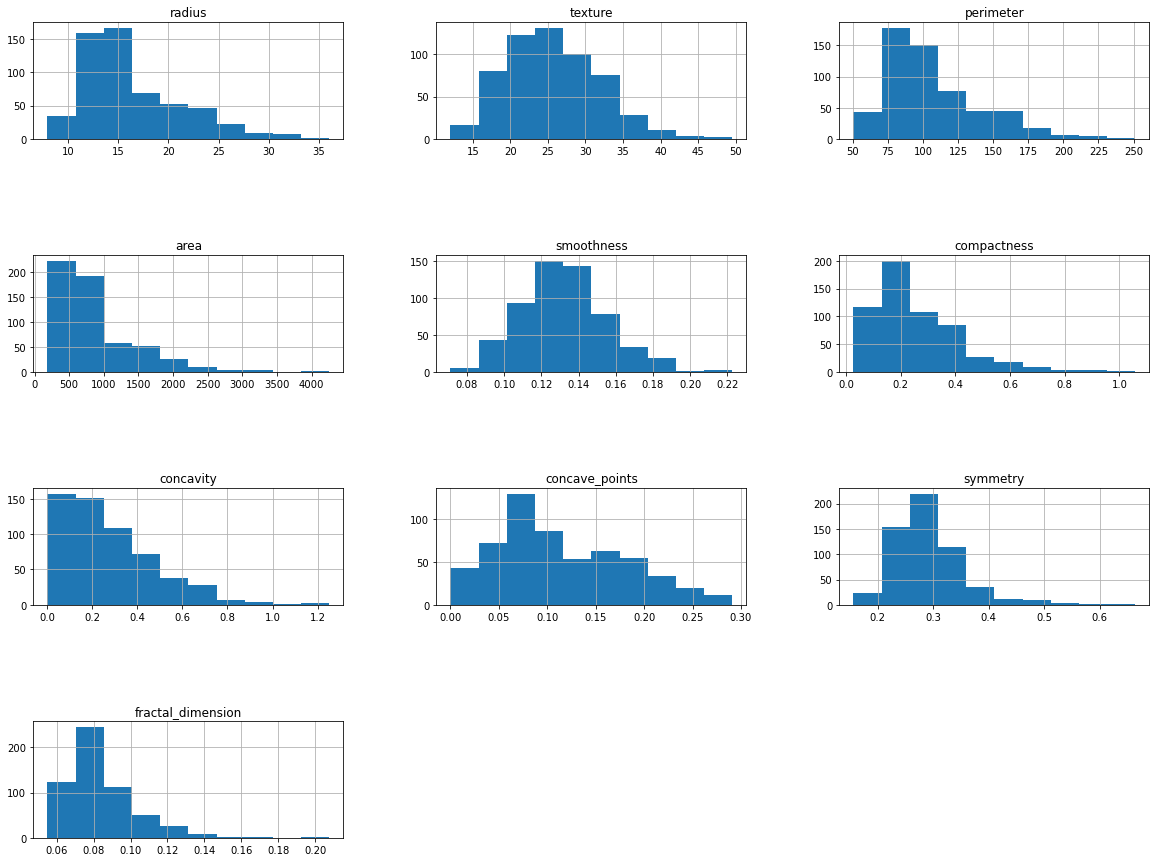

In [35]:
df1.hist(figsize=(20,15))
plt.subplots_adjust(hspace=1.0);

While most features appear to be skewed to the left, there are no obvious "red flag" outliers.

We can also inspect boxplots for outliers, as well as how the data generally look. Due to scale differences among features, we will temporarily scale the data for visualization purposes. This scaling will not be used beyond this graphic.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius'),
  Text(1, 0, 'texture'),
  Text(2, 0, 'perimeter'),
  Text(3, 0, 'area'),
  Text(4, 0, 'smoothness'),
  Text(5, 0, 'compactness'),
  Text(6, 0, 'concavity'),
  Text(7, 0, 'concave_points'),
  Text(8, 0, 'symmetry'),
  Text(9, 0, 'fractal_dimension')])

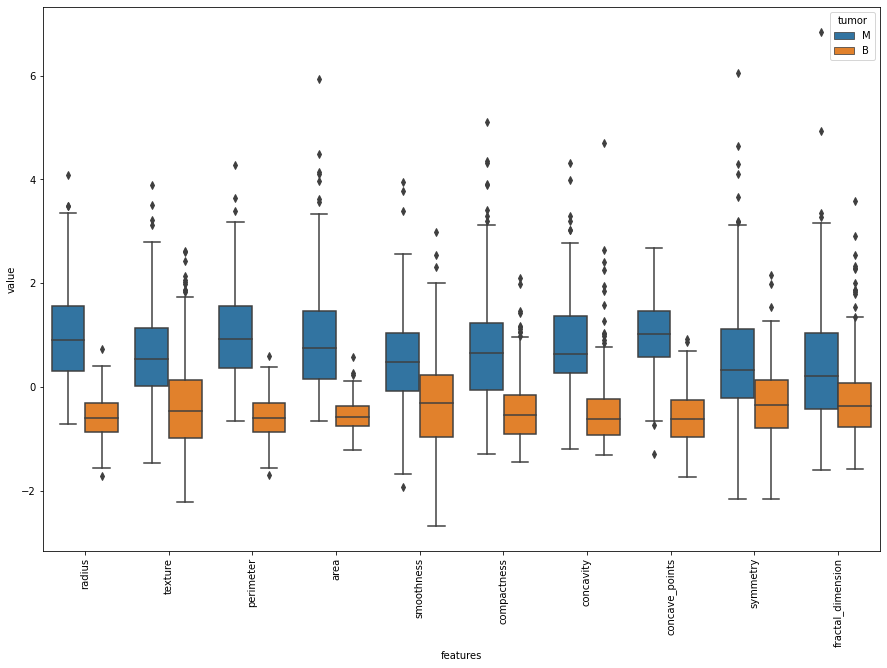

In [36]:
sc = StandardScaler()
df1s = df1.iloc[:,1:]
df1tar = df1['tumor']
df1s = pd.DataFrame(sc.fit_transform(df1s),columns=df1s.columns)
df1con = pd.concat([df1tar,df1s],axis=1)
data = pd.melt(df1con,id_vars='tumor',var_name='features',value_name='value')

plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="tumor", data=data)
plt.xticks(rotation=90)

Again, outliers exist, but nothing extreme.

Next we can visualize the correlations among the features

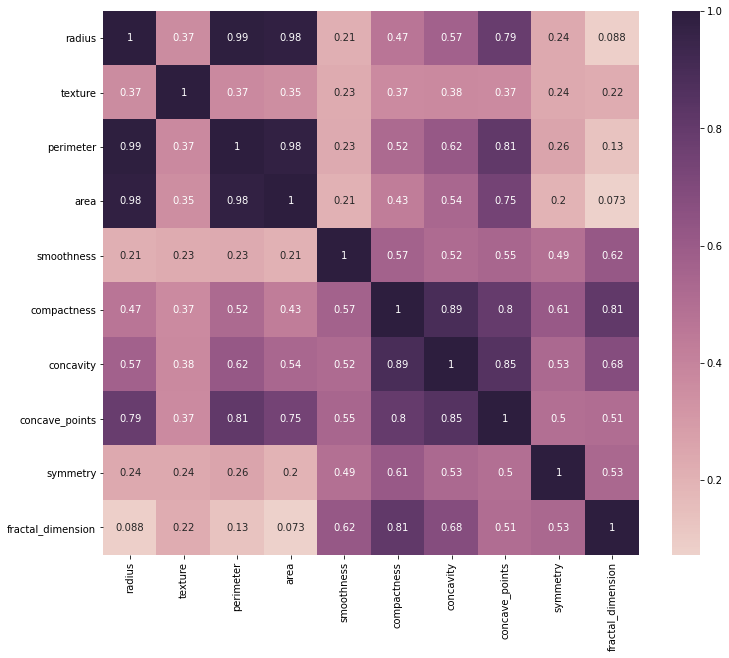

In [37]:
plt.subplots(figsize=(12,10))
sns.heatmap(df1[1:].corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True));

Some of our features are highly correlated, an issue which we can explore possible solutions to later on. One set of potentially problematic features are radius, perimeter, and area. This makes sense because these three are all a measure of size, and therefore would naturally be highly correlated. We may need to reduce these three into just one feature.

Reference for why we need to reduce highly correlated features:

https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e

Another correlation of interest might be concavity and concave_points. However, even though they are correlated, they are different measures of one aspect of the breast exam.

Yet another pair to make note of is compactness and concavity. This correlation may be due to more compact tissue creating a greater level of concavity.

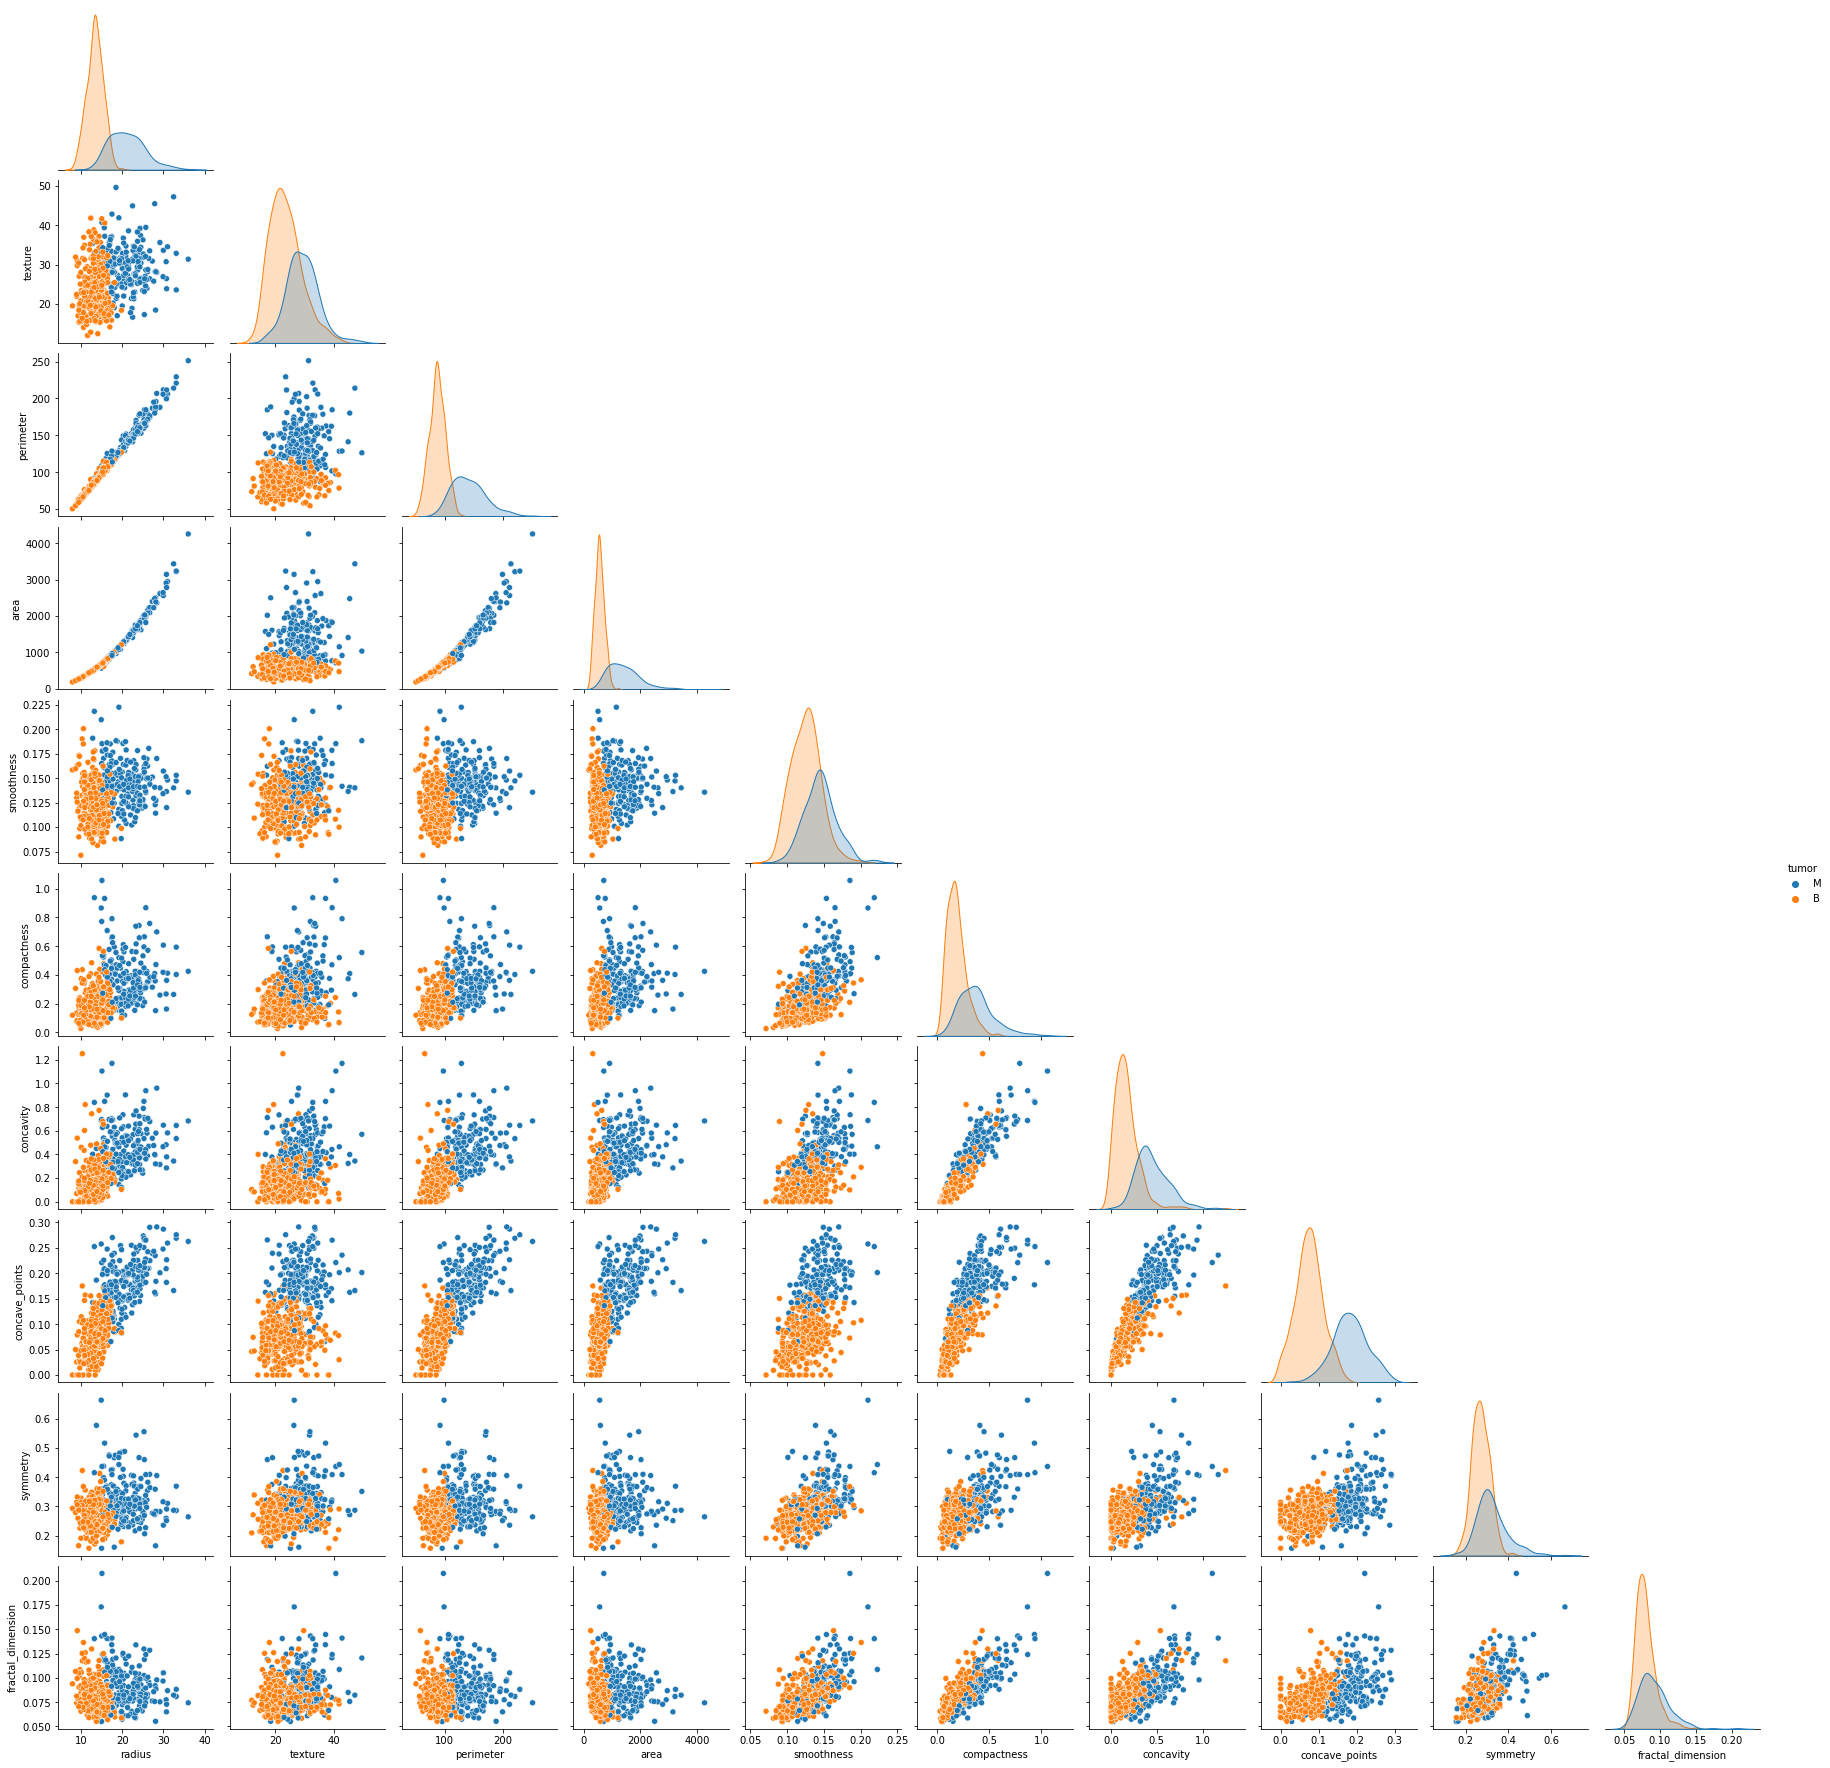

In [47]:
sns.pairplot(df1, hue="tumor" , corner=True)
plt.show()

Looking at each scatterplot of our pairplot, the distribution differences are stark. With such clear a distinction between benign and malignant tumors on nearly all of our metrics, the modeling for this project will likely appear to be "too good to be true."
However, this visualization is evidence to the contrary.

Something else to check before proceeding is the way in which each feature correlates with the target.

By creating dummy variables from the target class (just for use in this exercize) and re-running the correlation martix allows us to visualize these relations.

In [45]:
dfd = pd.get_dummies(df1['tumor'])
df2 = pd.concat([df1 , dfd], axis=1).drop(['tumor'],axis=1)
df2.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,B,M
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


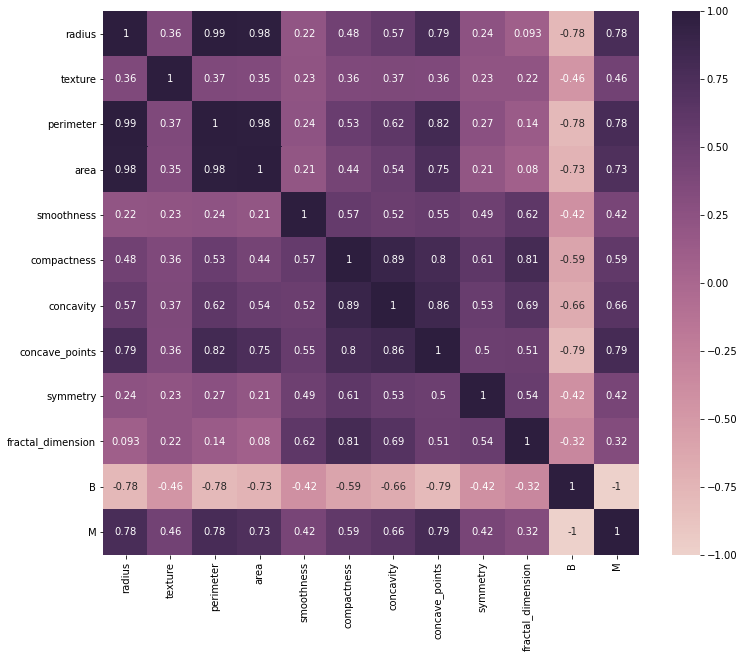

In [46]:
plt.subplots(figsize=(12,10))
sns.heatmap(df2.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True));

There are quite a few moderate correlations between features and targets.

Radius/perimeter/area are again culprits, as well as concave points. All 4 of these features correlate moderately positively with malignancy. Modeling with the data as-is would result in the model weighting these features very heavily, giving them high predictive power.

This could very well be the nature of breast tumors, in that showing certain tendencies on a select few metrics could tip off a keen observer (or a machine learning alorithm) as to the diagnosis of malignancy.

We also want to see how our target class is distributed.

The target is tumor class (B = Benign, M = Malignant)

In [94]:
bm = ['B','M']
bm_label = ['Benign','Malignant']

In [96]:
class_counts = df1['tumor'].value_counts()
class_p = pd.Series([(x / df1.shape[0]) * 100.00 for x in class_counts])

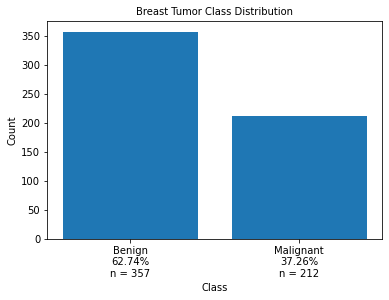

In [98]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0,1])

a=ax.get_xticks().tolist()
for i in a:
        a[i] = bm_label[i]+'\n' + class_p.round(2).astype(str)[i] + '%'+'\n' +'n = '+class_counts.astype(str)[i]
ax.set_xticklabels(a)
ax.set_ylabel('Count')
ax.set_xlabel('Class')
ax.set_title('Breast Tumor Class Distribution',
              fontsize = 10)
plt.show()

We appear to have a slightly imbalanced dataset, but nothing extreme.

At this point, we will reduce the features by eliminating redundantcy (based in high correlation)

In [48]:
df2 = df1.drop(columns=["area","perimeter","compactness","concave_points"])
df2.head()

,tumor,radius,texture,smoothness,concavity,symmetry,fractal_dimension
0,M,25.38,17.33,0.1622,0.7119,0.4601,0.11890
1,M,24.99,23.41,0.1238,0.2416,0.2750,0.08902
2,M,23.57,25.53,0.1444,0.4504,0.3613,0.08758
3,M,14.91,26.50,0.2098,0.6869,0.6638,0.17300
4,M,22.54,16.67,0.1374,0.4000,0.2364,0.07678


Split data into features and target

In [49]:
X = df2.drop(columns = ['tumor'])

In [50]:
y = df2['tumor']

Split data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

In [54]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

Due to the nature of the problem at hane, we want to minimize false negatives. Having a diagnosis of 'Benign' when your tumor is, in fact, 'Malignant' would be devastating. Therefore, we will utilize the 'recall' performance metric.

We will start with the Logistic Regression algorithm, and use cross-validation to assess the performance of models with different regularization parameters.

In [55]:
lrcv = LogisticRegressionCV(solver = 'saga', penalty = 'l2', 
                            max_iter = 5000, Cs=[0.1,1,10,100], 
                            cv = StratifiedKFold(n_splits=5, shuffle=True),
                           scoring='recall')

In [56]:
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.1, 1, 10, 100],
                     cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                     max_iter=5000, scoring='recall', solver='saga')

In [57]:
Cs = [0.1, 1, 10, 100]
j = 0

for i in lrcv.scores_['M'].T:
    print("CV score mean for C of ",Cs[j], " = ",i.mean(axis=0))
    j +=1

CV score mean for C of  0.1  =  0.9052873563218391
CV score mean for C of  1  =  0.945977011494253
CV score mean for C of  10  =  0.9593103448275864
CV score mean for C of  100  =  0.9593103448275864


In [58]:
lr = LogisticRegression(solver = 'saga', penalty = 'l2', max_iter = 5000, C=10)

In [59]:
lr.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=5000, solver='saga')

In [60]:
y_pred_tr = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [61]:
print("Classification Report for Training Data")
print(classification_report(y_train, y_pred_tr))

Classification Report for Training Data
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       250
           M       0.97      0.96      0.97       148

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



As always, training set performance will be exemplary due to the model being trained on that very data.

The important measure is how well the model performs on the test data.

In [62]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

           B       0.96      1.00      0.98       107
           M       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



As we expected based on earlier assumptions, the simple Logistic Regression model is extremely acccurate in assigning class labels, achieving 94% recall for the positive class "Malignant."

In [63]:
def one_out(out,X_train, X_test, y_train, y_test):
    """
    'out' is a list of the features in the data set,
    of which one feature is excluded at a time.
    
    LogReg is then looped through.
    
    Must use scaled data.
    """
    
    #code to time how long this code runs for
    start_time = datetime.now()
    
    col = X_train.columns
    cols = col.insert(0, "None")
    
    
    tr_recall = []
    tr_precision = []
    te_recall = []
    te_precision = []
    
    lr = LogisticRegression(solver = 'saga', penalty = 'l2', max_iter = 5000, C=100)
    
    lr.fit(X_train,y_train)
    y_pred_tr = lr.predict(X_train)
    y_pred_te = lr.predict(X_test)
    rstr = recall_score(y_train,y_pred_tr,pos_label='B')
    rste = recall_score(y_test,y_pred_te,pos_label='B')
    pstr = precision_score(y_train,y_pred_tr,pos_label='B')
    pste = precision_score(y_test,y_pred_te,pos_label='B')
    tr_recall.append(rstr)
    tr_precision.append(rste)
    te_recall.append(pstr)
    te_precision.append(pste)
    for i in out:
        thisX = X_train.drop(columns=i)
        XT = X_test.drop(columns=i)
        lr.fit(thisX,y_train)
        y_pred_tr = lr.predict(thisX)
        y_pred_te = lr.predict(XT)
        rstr = recall_score(y_train,y_pred_tr,pos_label='B')
        rste = recall_score(y_test,y_pred_te,pos_label='B')
        pstr = precision_score(y_train,y_pred_tr,pos_label='B')
        pste = precision_score(y_test,y_pred_te,pos_label='B')
        tr_recall.append(rstr)
        tr_precision.append(rste)
        te_recall.append(pstr)
        te_precision.append(pste)

    
    fig, ax = plt.subplots(2,1, figsize=(20, 20),sharey=True)
    
    ax[0].plot(cols, tr_recall, 'ro-')
    ax[0].plot(cols, tr_precision, 'go-')
    ax[0].set(xlabel='Feature held out', ylabel='performance', title='Training data')
    ax[0].axhline(y = tr_recall[0], color = 'r', linestyle = ':')
    ax[0].axhline(y = tr_precision[0], color = 'g', linestyle = ':')
    ax[0].legend(['Recall', 'Precision'], loc='lower left')
    
    ax[1].plot(cols, te_recall, 'ro-')
    ax[1].plot(cols, te_precision, 'go-')
    ax[1].set(xlabel='Feature held out', ylabel='performance', title='Testing data')
    ax[1].axhline(y = te_recall[0], color = 'r', linestyle = ':')
    ax[1].axhline(y = te_precision[0], color = 'g', linestyle = ':')
    ax[1].legend(['Recall', 'Precision'], loc='lower left')
    
    fig.subplots_adjust(left=0.1,bottom=0.5,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.show()
    end_time = datetime.now()
    print('Total Duration: {}'.format(end_time - start_time))  

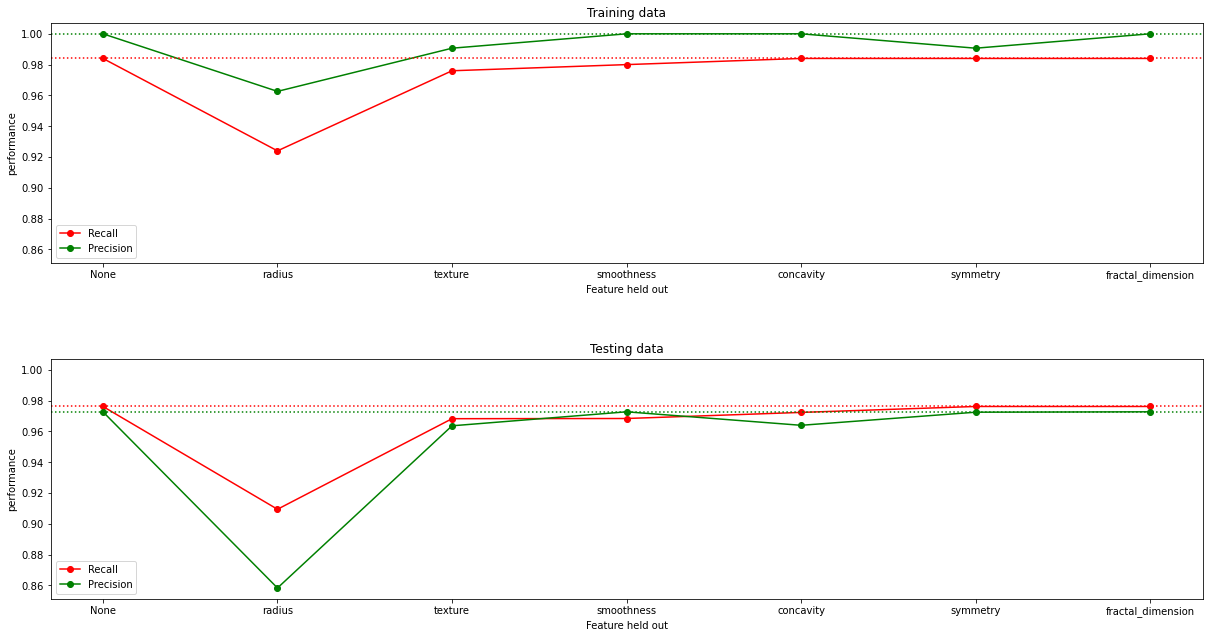

Total Duration: 0:00:00.786414


In [64]:
one_out(X_train.columns,X_train, X_test, y_train, y_test)

There is a nose-dive in predictive ability sans "radius" as a feature, and the scale of the difference is moderate (>5% change in recall).

Given what we know about the data and feature correlations, it is probablistic to surmise that "radius" is the most important feature for our model.

Finally, we will use hyperparameter tuning to find the best combination of parameters for our data.